In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.datasets import cifar10

from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA
import pandas as pd # pandas

from keras.utils import np_utils


### 1. Loading the dataset

In [20]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [21]:
# Lets determine the dataset characteristics
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))
print('Training Label: {}'.format(y_train.shape))
print('Testing Label: {}'.format(y_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)
Training Label: (50000, 1)
Testing Label: (10000, 1)


In [22]:
# Now for a single image 
print(X_train[0].shape,y_train[0].shape)

(32, 32, 3) (1,)


### 2. Preprocessing the dataset


In [23]:
X_train_0 = X_train
X_test_0 = X_test

In [24]:
# normalize the inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train_norm = X_train / 255.0
X_test_norm= X_test / 255.0

In [25]:
# class labels shape
print(y_train.shape)
print(y_train.shape)

(50000, 1)
(50000, 1)


In [26]:
# class labels reshape
y_train_reshape = y_train.reshape(-1,)
y_train[:5]
y_test_reshape = y_test.reshape(-1,)
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [27]:
nsamples_train, nx_train, ny_train, c_train = X_train_norm.shape
nsamples_test, nx_test, ny_test, c_test = X_test_norm.shape

In [28]:
X_train_flatten = X_train_norm.reshape((nsamples_train, nx_train*ny_train*c_train))
X_test_flatten = X_test_norm.reshape((nsamples_test, nx_test*ny_test*c_test))

In [29]:
X_train_flatten.shape,X_test_flatten.shape

((50000, 3072), (10000, 3072))

In [30]:
# Lets determine the dataset characteristics
print('Training Images: {}'.format(X_train_flatten.shape))
print('Testing Images: {}'.format(X_test_flatten.shape))
print('Training Label: {}'.format(y_train_reshape.shape))
print('Testing Label: {}'.format(y_test_reshape.shape))

Training Images: (50000, 3072)
Testing Images: (10000, 3072)
Training Label: (50000,)
Testing Label: (10000,)


## Ploting Images

In [31]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [32]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index].astype(int)])

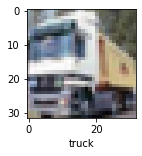

In [33]:
plot_sample(X_train_0, y_train_reshape, 1)

In [51]:
X_train_flatten_df = pd.DataFrame(X_train_flatten)
X_test_flatten_df = pd.DataFrame(X_test_flatten)
y_train_reshape_df=pd.DataFrame(y_train_reshape)
y_test_reshape_df=pd.DataFrame(y_test_reshape)

In [53]:
X_train_sample=X_train_flatten_df.sample(frac=0.1,random_state=0)
y_train_sample=y_train_reshape_df.sample(frac=0.1,random_state=0)


In [54]:
X_train_sample.shape,y_train_sample.shape

((5000, 3072), (5000, 1))

### Base Line Model - Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


###PCA - Principle Component Analysis

###PCA - Principle Component Analysis

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from imblearn.pipeline import make_pipeline
from sklearn.manifold import SpectralEmbedding


## Isomap Embedding

## Locally Linear Embedding

## Multidimensional scaling





## SpectralEmbedding



## T-distributed Stochastic Neighbor Embeddin

In [39]:
from sklearn import manifold
from sklearn import datasets

from IPython import display
import pylab as pl

from sklearn import preprocessing 
from collections import OrderedDict
from functools import partial 
from time import time

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

In [40]:
import matplotlib.pyplot as plt
from matplotlib import ticker

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import manifold, datasets

n_samples = 1500
S_points, S_color = datasets.make_s_curve(n_samples, random_state=0)

In [45]:
S_points.shape, S_color.shape

((1500, 3), (1500,))

In [41]:
n_neighbors = 12  # neighborhood which is used to recover the locally linear structure
n_components = 2  # number of coordinates for the manifold

params = {
    "n_neighbors": n_neighbors,
    "n_components": n_components,
    "eigen_solver": "auto",
    "random_state": 0,
}

lle_standard = manifold.LocallyLinearEmbedding(method="standard", **params)
S_standard = lle_standard.fit_transform(S_points)

lle_ltsa = manifold.LocallyLinearEmbedding(method="ltsa", **params)
S_ltsa = lle_ltsa.fit_transform(S_points)

# lle_hessian = manifold.LocallyLinearEmbedding(method="hessian", **params)
# S_hessian = lle_hessian.fit_transform(S_points)

lle_mod = manifold.LocallyLinearEmbedding(method="modified", **params)
S_mod = lle_mod.fit_transform(S_points)


In [42]:
def plot_3d(points, points_color, title):
    x, y, z = points.T

    fig, ax = plt.subplots(
        figsize=(6, 6),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=50, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(1))

    fig.colorbar(col, ax=ax, orientation="horizontal", shrink=0.6, aspect=60, pad=0.01)
    plt.show()


def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()
    
def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())

In [43]:
# fig, axs = plt.subplots(
#     nrows=3, figsize=(7, 7), facecolor="white", constrained_layout=True
# )
# fig.suptitle("Locally Linear Embeddings", size=16)

# lle_methods = [
#     # ("Standard locally linear embedding", S_standard),
#     # ("Local tangent space alignment", S_ltsa),
#     # ("Hessian eigenmap", S_hessian),
#     ("Modified locally linear embedding", S_mod),
# ]


# for ax, method in zip(axs.flat, lle_methods):
#     name, points = method
#     add_2d_scatter(ax, points, S_color, name)

# plt.show()

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_train_flatten_df, y_train_reshape_df, test_size=0.9, random_state=42)
X_train_sample.shape
# X_train_sample=X_train_flatten_df.sample(frac=0.1,random_state=0)
# y_train_sample=y_train_reshape_df.sample(frac=0.1,random_state=0)


(5000, 3072)

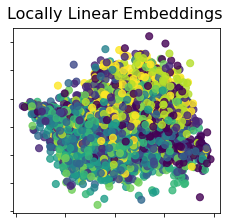

In [62]:
LLE = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components)
S_LLE = LLE.fit_transform(X_train_sample)

plot_2d(S_LLE, y_train_sample, "Locally Linear Embeddings")

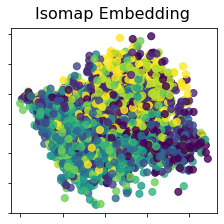

In [63]:
isomap = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components, p=1)
S_isomap = isomap.fit_transform(X_train_sample)

plot_2d(S_isomap, y_train_sample, "Isomap Embedding")

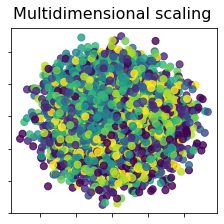

In [64]:
md_scaling = manifold.MDS(
    n_components=n_components,
    max_iter=50,
    n_init=4,
    random_state=0,
    normalized_stress=False,
)
S_scaling = md_scaling.fit_transform(X_train_sample)

plot_2d(S_scaling, y_train_sample, "Multidimensional scaling")

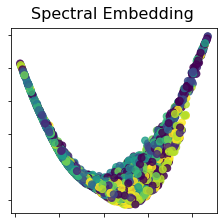

In [65]:
spectral = manifold.SpectralEmbedding(
    n_components=n_components, n_neighbors=n_neighbors
)
S_spectral = spectral.fit_transform(X_train_sample)

plot_2d(S_spectral, y_train_sample, "Spectral Embedding")

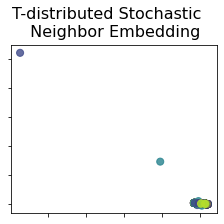

In [66]:
t_sne = manifold.TSNE(
    n_components=n_components,
    perplexity=30,
    init="random",
    n_iter=250,
    random_state=0,
)
S_t_sne = t_sne.fit_transform(X_train_sample)

plot_2d(S_t_sne, y_train_sample, "T-distributed Stochastic  \n Neighbor Embedding")

In [ ]:
# def plotthis(X, color):
#   models = [
#       ('PCA',PCA(n_components=2)),
#       ('Isomap',manifold.Isomap()),
#       ('LLE LLE',manifold.LocallyLinearEmbedding(method = 'standard')),
#       ("MDS",MDS(n_components=2)),
#       ('SE',manifold.SpectralEmbedding()),
#       ('t-SNE',manifold.TSNE( )),
#       ('LLE',manifold.LocallyLinearEmbedding(method = 'standard')),
#       ('LTSA',manifold.LocallyLinearEmbedding(method = 'ltsa')),
#       ('Hessian LLE',manifold.LocallyLinearEmbedding(n_neighbors=6,  method = 'hessian', eigen_solver ='dense')),
#       ('MDS',manifold.MDS()),
#       ('SE',manifold.SpectralEmbedding()),
#       ('t-SNE',manifold.TSNE( )),
#       ('PCA',PCA(n_components=2)),
#   ]
#   #plot
#   for i, (label,method) in enumerate (models):
#     Y = method.fit_transform(X)
#     plt.scatter(Y[:,0],Y[:,1],c=color,cmap=plt.cm.Spectral)
#     plt.title(label)
#     plt.show()



In [ ]:
# X,y = datasets.load_breast_cancer(return_X_y = True)
# color = y
# plotthis(X,color)
 

In [ ]:
# Y_train_coded = np_utils.to_categorical(y_train)
# Y_test_coded= np_utils.to_categorical(y_test)
# num_classes = Y_test_coded.shape[1]

# print(Y_train_coded.shape)
# print(Y_test_coded[0])